In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\HP\Documents\Datasets name Online Retail Dataset\customer.xlsx")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Based on the information provided from the `df.info()` output, here is a breakdown of the dataset:

- **Total Entries**: 541,909
- **Total Columns**: 8

### Columns:

1. **InvoiceNo**: 
   - Type: `object`
   - Non-null entries: 541,909 (no missing values)

2. **StockCode**: 
   - Type: `object`
   - Non-null entries: 541,909 (no missing values)

3. **Description**: 
   - Type: `object`
   - Non-null entries: 540,455 (missing 1,454 values)

4. **Quantity**: 
   - Type: `int64`
   - Non-null entries: 541,909 (no missing values)

5. **InvoiceDate**: 
   - Type: `datetime64[ns]`
   - Non-null entries: 541,909 (no missing values)

6. **UnitPrice**: 
   - Type: `float64`
   - Non-null entries: 541,909 (no missing values)

7. **CustomerID**: 
   - Type: `float64`
   - Non-null entries: 406,829 (missing 135,080 values)

8. **Country**: 
   - Type: `object`
   - Non-null entries: 541,909 (no missing values)

### Memory Usage:

- The dataset uses approximately 33.1 MB of memory.

### Observations:

- The `Description` and `CustomerID` columns contain some missing values.
- The `InvoiceDate` is properly recognized as a datetime object, which is useful for time-based analysis.
- The `CustomerID` column is of type `float64`, but it might make more sense as an `object` or `int` if it's an identifier.

If you need any specific analysis or operations performed on this data, please let me know!

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
missing_values = df.isnull().sum()

print(missing_values)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

print(missing_percentage)


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


## Removing the missing values

In [8]:
# Remove rows with missing values in 'Description' and 'CustomerID' columns
df_cleaned = df.dropna(subset=['Description', 'CustomerID'])

# Confirm the removal
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None


# "How can promotions be leveraged to enhance sales performance and customer engagement?"

To answer the question "How do discounts or promotions affect customer buying behavior, and what strategies could be implemented to optimize pricing and maximize revenue?" as a data analyst, you can follow a detailed process involving data preparation, exploratory data analysis (EDA), hypothesis testing, and visualization

## Feature Engineering:

    Calculate the total price for each line item (TotalPrice = Quantity * UnitPrice).

In [9]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


<ipython-input-9-b103bf04df07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [10]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Exploratory Data Analysis (EDA)

    Summary Statistics:
        Compute summary statistics (mean, median, standard deviation) for quantities and total prices.

In [11]:
df_cleaned.describe()


,Quantity,UnitPrice,CustomerID,TotalPrice
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


### Summary Statistics:

1. **Count**: Number of non-null entries in each column.
2. **Mean**: The average value of the column.
3. **Std** (Standard Deviation): Measures the dispersion or variability in the data.
4. **Min**: The smallest value in the column.
5. **25%**: The first quartile (25th percentile), which is the value below which 25% of the data fall.
6. **50%** (Median): The middle value, which is the value below which 50% of the data fall.
7. **75%**: The third quartile (75th percentile), which is the value below which 75% of the data fall.
8. **Max**: The largest value in the column.

### Insights:

- **Quantity**: 
  - Mean: 12.06
  - Standard Deviation: 248.69 (high variability)
  - Min: -80,995 (negative quantity might indicate returns or errors)
  - Max: 80,995

- **UnitPrice**: 
  - Mean: 3.46
  - Standard Deviation: 69.32 (high variability)
  - Min: 0.00 (free items or errors)
  - Max: 38,970

- **CustomerID**: 
  - Mean: 15,287.69
  - Standard Deviation: 1,713.60
  - Min: 12,346
  - Max: 18,287

- **TotalPrice** (calculated field, presumably `Quantity * UnitPrice`): 
  - Mean: 20.40
  - Standard Deviation: 427.59 (high variability)
  - Min: -168,469.60 (could indicate large returns or errors)
  - Max: 168,469.60

### Recommendations:

1. **Investigate Anomalies**:
   - Negative values in `Quantity` and `TotalPrice` need further investigation to understand if they are returns, data entry errors, or other anomalies.
   - Zero or very high `UnitPrice` values should be checked for validity.

2. **Handle Outliers**:
   - Consider removing or correcting extreme outliers if they are errors or not relevant to your analysis.

3. **Data Transformation**:
   - If negative values represent returns, consider separating them from sales to avoid skewing the analysis.
   - Consider using log transformation for highly skewed data to normalize the distribution.

4. **Consistency Checks**:
   - Ensure `TotalPrice` is correctly calculated as `Quantity * UnitPrice`.
   - Verify that `CustomerID` values are valid and consistent.


### Investigating the Anomalies

Negative values in Quantity and TotalPrice need further investigation to understand if they are returns, data entry errors, or other anomalies.

In [12]:
# Filter rows with negative Quantity
negative_quantity = df_cleaned[df_cleaned['Quantity'] < 0]

# Filter rows with negative TotalPrice
negative_total_price = df_cleaned[df_cleaned['TotalPrice'] < 0]


In [13]:
# Display a few rows of negative quantities
negative_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [14]:
# Display a few rows of negative total prices
negative_total_price.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


### Check Corresponding Invoices

Check if there are any patterns in the InvoiceNo for negative values. Often, returns are associated with specific invoice types:

In [15]:
# Examine InvoiceNo for negative quantities
invoice_negative_quantity = negative_quantity['InvoiceNo'].value_counts()

# Examine InvoiceNo for negative total prices
invoice_negative_total_price = negative_total_price['InvoiceNo'].value_counts()

invoice_negative_quantity.head()



C570867    101
C560540     57
C548460     45
C560855     41
C570828     39
Name: InvoiceNo, dtype: int64

In [16]:
invoice_negative_total_price.head()

C570867    101
C560540     57
C548460     45
C560855     41
C570828     39
Name: InvoiceNo, dtype: int64

### Investigate Related Entries

Check related entries for a few invoices with negative values. This helps understand if they are returns (often there will be a corresponding positive entry):

In [17]:
# Example InvoiceNo to investigate
example_invoice_no = negative_quantity['InvoiceNo'].iloc[0]

# Filter all rows related to the example invoice
related_entries = df_cleaned[df_cleaned['InvoiceNo'] == example_invoice_no]

related_entries


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527.0,United Kingdom,-27.5


# 

To remove rows with the specified invoice numbers that contain negative values, you can filter out these rows from your DataFrame. 

In [18]:
# List of invoice numbers with negative values
invoices_to_remove = ['C570867', 'C560540', 'C548460', 'C560855', 'C538341']

# Remove rows with the specified invoice numbers
df_cleaned = df_cleaned[~df_cleaned['InvoiceNo'].isin(invoices_to_remove)]

# Confirm the removal
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406546 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406546 non-null  object        
 1   StockCode    406546 non-null  object        
 2   Description  406546 non-null  object        
 3   Quantity     406546 non-null  int64         
 4   InvoiceDate  406546 non-null  datetime64[ns]
 5   UnitPrice    406546 non-null  float64       
 6   CustomerID   406546 non-null  float64       
 7   Country      406546 non-null  object        
 8   TotalPrice   406546 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [19]:
# Verify that the rows have been removed
df_cleaned[df_cleaned['InvoiceNo'].isin(invoices_to_remove)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice


In [20]:
df_cleaned.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,406546.000000,406546.000000,406546.000000,406546.000000
mean,12.074540,3.460829,15288.658612,20.425531
std,248.779283,69.339246,1713.239837,427.738016
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13956.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.250000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


It appears that despite removing the specified invoice numbers, there are still negative values in the Quantity and TotalPrice columns. This indicates that there might be other rows with negative values that were not associated with the provided invoice numbers

### Filter Out Rows with Negative Values

Filter out all rows where either Quantity or TotalPrice is negative:

In [21]:
# Remove rows with negative Quantity or TotalPrice
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['TotalPrice'] >= 0)]

# Confirm the removal
df_cleaned.describe()


,Quantity,UnitPrice,CustomerID,TotalPrice
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [22]:
# Check for any remaining negative values
negative_quantity_remaining = df_cleaned[df_cleaned['Quantity'] < 0]
negative_total_price_remaining = df_cleaned[df_cleaned['TotalPrice'] < 0]

print("Remaining Negative Quantities:")
negative_quantity_remaining

Remaining Negative Quantities:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice


In [23]:
print("Remaining Negative Total Prices:")
negative_total_price_remaining

Remaining Negative Total Prices:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice


In [24]:
df_cleaned.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


### Summary Statistics:

    Quantity:
        Count: 397,924
        Mean: 13.02
        Standard Deviation: 180.42
        Minimum: 1
        25th Percentile: 2
        50th Percentile (Median): 6
        75th Percentile: 12
        Maximum: 80,995

    UnitPrice:
        Count: 397,924
        Mean: 3.12
        Standard Deviation: 22.10
        Minimum: 0
        25th Percentile: 1.25
        50th Percentile (Median): 1.95
        75th Percentile: 3.75
        Maximum: 8,142.75

    CustomerID:
        Count: 397,924
        Mean: 15,294.32
        Standard Deviation: 1,713.17
        Minimum: 12,346
        25th Percentile: 13,969
        50th Percentile (Median): 15,159
        75th Percentile: 16,795
        Maximum: 18,287

    TotalPrice:
        Count: 397,924
        Mean: 22.39
        Standard Deviation: 309.06
        Minimum: 0
        25th Percentile: 4.68
        50th Percentile (Median): 11.80
        75th Percentile: 19.80
        Maximum: 168,469.60

### Observations:

   Quantity: Now all values are positive, with the minimum value being 1.
   UnitPrice: There are still some zero values, which might indicate free items or data entry errors.
   TotalPrice: Minimum value is now zero, but zero total prices should be examined for their validity.

### Investigate Zero Values:

    Check if UnitPrice values of zero are valid (e.g., promotions or free samples).
    Similarly, check TotalPrice values of zero to ensure they are legitimate

In [25]:
# Rows with UnitPrice of zero
zero_unit_price = df_cleaned[df_cleaned['UnitPrice'] == 0]
print("Rows with UnitPrice of zero:")
zero_unit_price.head()

Rows with UnitPrice of zero:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0


In [26]:
# Rows with TotalPrice of zero
zero_total_price = df_cleaned[df_cleaned['TotalPrice'] == 0]
print("Rows with TotalPrice of zero:")
zero_total_price.head()

Rows with TotalPrice of zero:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0


## Sales Trends:

   Plot sales trends over time to identify any natural patterns or seasonality.

<AxesSubplot:xlabel='InvoiceDate'>

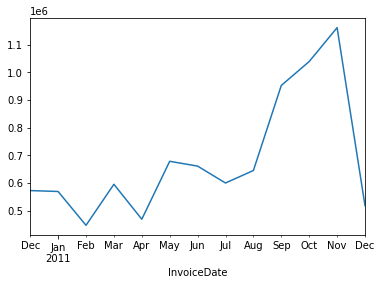

In [27]:
df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.to_period('M')).sum()['TotalPrice'].plot(kind='line')

Determining the dates for discounts and promotions can be challenging when there is no explicit column indicating such events. However, you can infer possible promotions or discounts through analysis and pattern recognition. Here are some steps you can take:
Steps to Determine Possible Promotion Dates

   ### Identify Zero or Unusually Low Unit Prices:
        Transactions with zero or very low unit prices might indicate discounts or promotions.

   ### Analyze Quantity Purchased:
        Large quantities purchased at once may indicate bulk discounts.

   ### Look for Patterns in Invoice Dates:
        Check for specific dates or periods with spikes in sales volume, which might correspond to promotional events.

   ### Group by Date and Aggregate:
        Aggregate sales data by day to identify any anomalies in sales volume or unit price.

   ### Visualize the Data:
        Use visualizations to spot trends or patterns that may suggest promotional periods.

In [28]:
# Identify transactions with unit prices <= 1
low_unit_price = df_cleaned[df_cleaned['UnitPrice'] <= 1]

# Identify transactions with unit prices == 0
low_unit_price_zero = df_cleaned[df_cleaned['UnitPrice'] == 0]

# Concatenate the two DataFrames
combined_low_unit_price = pd.concat([low_unit_price, low_unit_price_zero])

# Drop duplicates if there are any
combined_low_unit_price = combined_low_unit_price.drop_duplicates()

print("Transactions with Zero or Low Unit Prices:")
combined_low_unit_price


Transactions with Zero or Low Unit Prices:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.20
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.60
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,40.80
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583.0,France,17.00
42,536370,22540,MINI JIGSAW CIRCUS PARADE,24,2010-12-01 08:45:00,0.42,12583.0,France,10.08
...,...,...,...,...,...,...,...,...,...
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom,10.50
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,15804.0,United Kingdom,10.20
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom,4.68
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom,11.40


In [29]:
low_unit_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.20
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.60
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,40.80
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583.0,France,17.00
42,536370,22540,MINI JIGSAW CIRCUS PARADE,24,2010-12-01 08:45:00,0.42,12583.0,France,10.08
...,...,...,...,...,...,...,...,...,...
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom,10.50
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,15804.0,United Kingdom,10.20
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom,4.68
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom,11.40


### Analyze Quantity Purchased in Low Unit Price Transactions

In [30]:
# Analyze quantities in transactions with low unit prices
print("Summary of Quantities for Low Unit Price Transactions:")
low_unit_price['Quantity'].describe()


Summary of Quantities for Low Unit Price Transactions:


count    93096.000000
mean        22.102357
std         78.248210
min          1.000000
25%          4.000000
50%         12.000000
75%         24.000000
max      12540.000000
Name: Quantity, dtype: float64

The summary of quantities for transactions with zero or low unit prices provides insights into the distribution of quantities for these specific transactions. Here's an interpretation of each statistic:

   Count: There are 93,096 transactions with zero or low unit prices in the dataset.

   Mean: The average quantity per transaction is approximately 22.1 units. This indicates that on average, each of these transactions involves about 22 items.

   Standard Deviation (std): The standard deviation of 78.25 indicates significant variability in the quantities of items in these transactions. Some transactions involve many more items than others.

   Min: The smallest quantity in any of these transactions is 1. This shows that at least one transaction involved only a single item.

   25% (1st Quartile): 25% of the transactions involve 4 or fewer items. This gives a sense of the lower end of the quantity distribution.

   50% (Median): The median quantity is 12, meaning half of the transactions involve 12 or fewer items. This is a more typical quantity for these transactions than the mean, suggesting the distribution may be skewed by higher values.

   75% (3rd Quartile): 75% of the transactions involve 24 or fewer items. This further shows the concentration of transactions with lower quantities.

   Max: The largest quantity in any single transaction is 12,540. This indicates there is at least one transaction with a very high quantity of items, which likely contributes to the high standard deviation and mean.

### Interpretation:

   High Variability: The high standard deviation compared to the mean suggests that while many transactions involve relatively small quantities, there are some transactions with very large quantities.

   Skewed Distribution: The large difference between the mean (22.1) and the median (12) suggests that the distribution of quantities is right-skewed. This means there are a small number of transactions with very large quantities that are pulling the mean higher.

   Typical Transaction: For the majority of transactions (the median and the 1st and 3rd quartiles), quantities range between 4 and 24. Transactions involving more than 24 items are less common but do exist.

### Group by Date and Aggregate

In [31]:
# Group by date and aggregate to identify spikes
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
daily_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date).agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

print("Daily Sales Summary:")
daily_sales.head()

Daily Sales Summary:


,InvoiceDate,Quantity,TotalPrice
0,2010-12-01,24215,46376.49
1,2010-12-02,31142,47316.53
2,2010-12-03,11839,23921.71
3,2010-12-05,16450,31771.60
4,2010-12-06,16291,31215.64


The daily sales summary provides insights into the total quantities sold and the total revenue generated on each day. Here's a breakdown of the key points and their potential implications:
Key Observations:

   ### Daily Trends:
   December 1, 2010:
   Quantity Sold: 24,215 units
   Total Sales: £46,376.49
   
   December 2, 2010:
   Quantity Sold: 31,142 units
   Total Sales: £47,316.53
   
   December 3, 2010:
   Quantity Sold: 11,839 units
   Total Sales: £23,921.71
   
   December 5, 2010:
   Quantity Sold: 16,450 units
   Total Sales: £31,771.60
   
   December 6, 2010:
   Quantity Sold: 16,291 units
   Total Sales: £31,215.64

   ### Variability in Sales:
   There is noticeable variability in both the quantities sold and total sales across these days.
   The highest quantity sold was on December 2, 2010 (31,142 units), with the highest total sales (£47,316.53).
   The lowest quantity sold was on December 3, 2010 (11,839 units), with the lowest total sales (£23,921.71).

   ### Sales Patterns:
  Sales on December 1 and 2 are significantly higher in both quantity and total price compared to the other days listed.
  Sales on December 3 are notably lower, which could indicate a slow sales day or reduced promotional activity.
  Sales on December 5 and 6 show similar quantities and total sales, suggesting consistent sales performance on these days.

   ### Potential Implications:

   #### Promotion and Marketing:
   High sales on December 1 and 2 might be due to successful promotions or marketing campaigns. Understanding what drove these sales spikes could help replicate this success on other days.
   
   Lower sales on December 3 might suggest a need to investigate any external factors (e.g., a weekend, public holiday) or internal factors (e.g., stock shortages, less marketing effort).

   #### Inventory Management:
   The variability in daily sales volumes highlights the importance of having a flexible inventory management system. Ensuring adequate stock for high sales days can prevent stockouts, while adjusting for low sales days can prevent overstocking.

  #### Sales Strategy:
   Consistent sales on December 5 and 6 could indicate stable demand during this period. Understanding customer behavior during these days might help in planning future sales strategies.

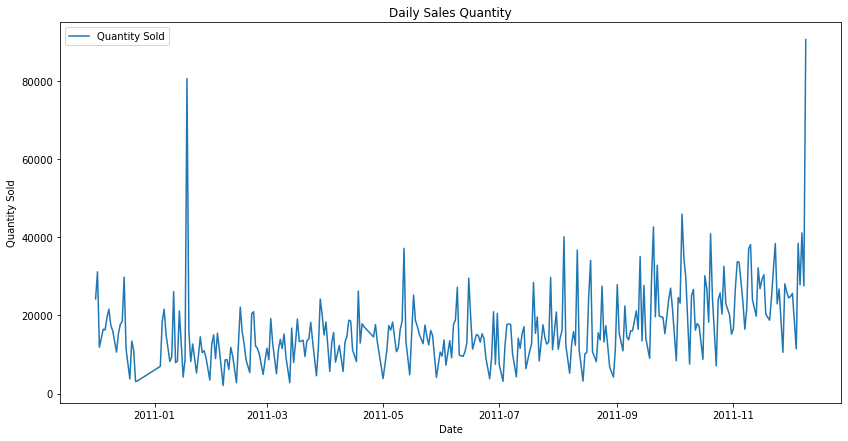

In [47]:
# Plot daily sales quantities to identify spikes
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['InvoiceDate'], daily_sales['Quantity'], label='Quantity Sold')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Daily Sales Quantity')
plt.legend()
plt.show()


In [38]:
# Filter out dates with unusually high sales quantities
promotion_threshold = daily_sales['Quantity'].quantile(0.90)  # Adjust threshold as needed
potential_promotion_dates = daily_sales[daily_sales['Quantity'] > promotion_threshold]

print("Potential Promotion Dates:")
potential_promotion_dates


Potential Promotion Dates:


,InvoiceDate,Quantity,TotalPrice
1,2010-12-02,31142,47316.53
13,2010-12-16,29797,49030.08
32,2011-01-18,80618,87589.11
125,2011-05-12,37149,59901.56
153,2011-06-15,29530,45077.54
190,2011-07-28,29710,54198.37
196,2011-08-04,40097,62079.61
202,2011-08-11,36710,54386.17
208,2011-08-18,34077,54082.81
229,2011-09-13,35029,48162.25


The list of "Potential Promotion Dates" includes dates with significantly high sales quantities and total sales, suggesting these days might have involved promotional activities or special events. Here’s what we can infer from this data:
Key Observations:

 ### High Sales Volumes:
   These dates show high quantities sold and high total sales, indicating successful promotional activities or high-demand periods.
   The most notable date is January 18, 2011, with 80,618 units sold, generating £87,589.11 in sales.
   Another standout date is December 9, 2011, with 90,582 units sold and £184,349.28 in sales.

 ### Frequent High Sales:
   Several dates in August, September, October, and November 2011 show consistently high sales volumes and total sales.
   This could indicate periodic promotional campaigns, such as weekly or monthly sales events.

In [41]:
# Assuming df_cleaned is your DataFrame
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
daily_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date).agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Identify top 5% sales quantities as promotional periods
promotion_threshold = daily_sales['Quantity'].quantile(0.95)
promotion_dates = daily_sales[daily_sales['Quantity'] > promotion_threshold]['InvoiceDate']

# Create a promotional flag in the original DataFrame
df_cleaned['is_promotional'] = df_cleaned['InvoiceDate'].dt.date.isin(promotion_dates)


In [42]:
# Group by InvoiceNo to get sales per invoice
invoice_sales = df_cleaned.groupby(['InvoiceNo', 'is_promotional']).agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Calculate average sales per invoice for promotional and non-promotional periods
avg_sales_per_invoice = invoice_sales.groupby('is_promotional')['TotalPrice'].mean()
avg_quantity_per_invoice = invoice_sales.groupby('is_promotional')['Quantity'].mean()

print("Average Sales per Invoice (Promotional vs Non-Promotional):")
avg_sales_per_invoice

Average Sales per Invoice (Promotional vs Non-Promotional):


is_promotional
False    450.747650
True     852.154192
Name: TotalPrice, dtype: float64

### Key Observations:

   #### Average Sales per Invoice (Non-Promotional):
   For non-promotional periods, the average sales per invoice are approximately £450.75.

  #### Average Sales per Invoice (Promotional):
   For promotional periods, the average sales per invoice are significantly higher at approximately £852.15.

### Interpretation:

  #### Promotional Effectiveness:
   The average sales per invoice are nearly double during promotional periods compared to non-promotional periods. This indicates that promotions are highly effective in increasing the sales value per transaction.
   
  #### Customer Spending Behavior:
   During promotions, customers tend to spend more per invoice. This could be due to discounts, special offers, or bundles that encourage larger purchases.
   Promotions might also attract higher traffic to the store or website, resulting in increased total sales per customer visit

In [43]:
print("\nAverage Quantity per Invoice (Promotional vs Non-Promotional):")
avg_quantity_per_invoice


Average Quantity per Invoice (Promotional vs Non-Promotional):


is_promotional
False    260.660292
True     513.255411
Name: Quantity, dtype: float64

### Key Observations:

   Average Quantity per Invoice (Non-Promotional):
   For non-promotional periods, the average quantity per invoice is approximately 260.66 items.

   Average Quantity per Invoice (Promotional):
   For promotional periods, the average quantity per invoice is significantly higher at approximately 513.26 items.

### Interpretation:

  #### Increased Purchase Volumes During Promotions:
   The average quantity per invoice nearly doubles during promotional periods compared to non-promotional periods. This indicates that promotions are highly effective in increasing the number of items purchased per transaction.
     
 #### Customer Buying Behavior:
   During promotions, customers tend to buy more items per invoice. This could be due to discounts, bulk purchase incentives, or attractive deals on multiple items.
   Promotions likely create a sense of urgency or value, encouraging customers to stock up or buy more than they usually would.

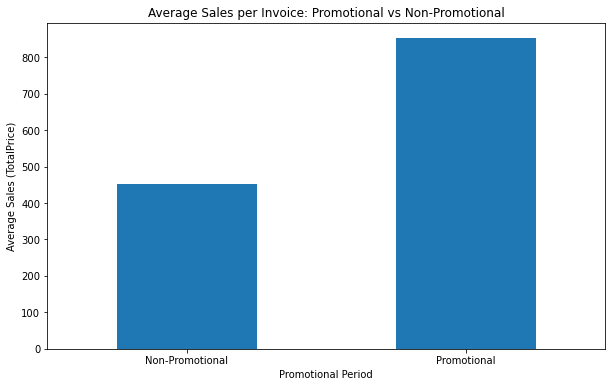

In [44]:
# Bar chart for average sales per invoice
avg_sales_per_invoice.plot(kind='bar', figsize=(10, 6), title='Average Sales per Invoice: Promotional vs Non-Promotional')
plt.ylabel('Average Sales (TotalPrice)')
plt.xlabel('Promotional Period')
plt.xticks(ticks=[0, 1], labels=['Non-Promotional', 'Promotional'], rotation=0)
plt.show()

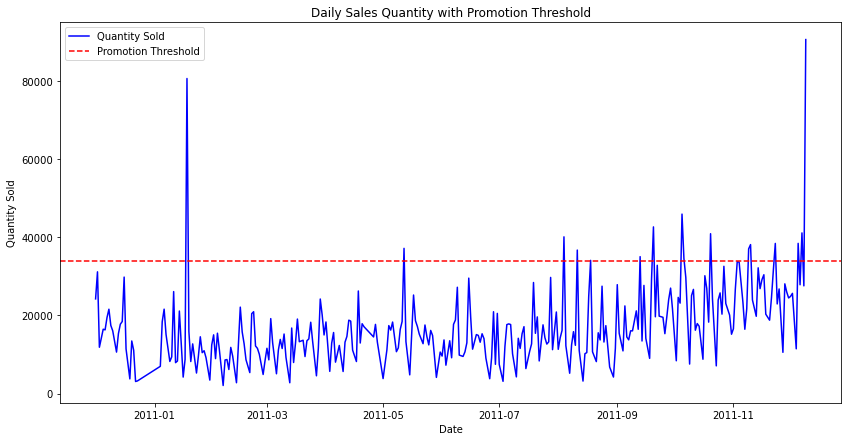

In [45]:
# Line chart for daily sales quantities
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['InvoiceDate'], daily_sales['Quantity'], label='Quantity Sold', color='blue')
plt.axhline(y=promotion_threshold, color='red', linestyle='--', label='Promotion Threshold')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Daily Sales Quantity with Promotion Threshold')
plt.legend()
plt.show()


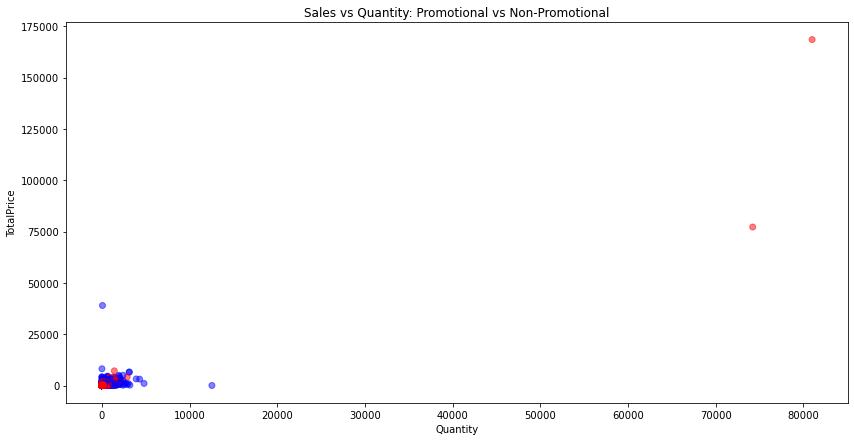

In [46]:
# Scatter plot for sales vs quantity colored by promotional period
colors = {True: 'red', False: 'blue'}
plt.figure(figsize=(14, 7))
plt.scatter(df_cleaned['Quantity'], df_cleaned['TotalPrice'], c=df_cleaned['is_promotional'].map(colors), alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.title('Sales vs Quantity: Promotional vs Non-Promotional')
plt.show()


In [48]:
pip install pandas plotly dash

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\programdata\anaconda3\lib\site-packages (5.14.1)



In [49]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html

# Assuming df_cleaned is your DataFrame and already preprocessed
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
daily_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date).agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Identify top 5% sales quantities as promotional periods
promotion_threshold = daily_sales['Quantity'].quantile(0.95)
promotion_dates = daily_sales[daily_sales['Quantity'] > promotion_threshold]['InvoiceDate']

# Create a promotional flag in the original DataFrame
df_cleaned['is_promotional'] = df_cleaned['InvoiceDate'].dt.date.isin(promotion_dates)

# Group by InvoiceNo to get sales per invoice
invoice_sales = df_cleaned.groupby(['InvoiceNo', 'is_promotional']).agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Calculate average sales per invoice for promotional and non-promotional periods
avg_sales_per_invoice = invoice_sales.groupby('is_promotional')['TotalPrice'].mean().reset_index()
avg_quantity_per_invoice = invoice_sales.groupby('is_promotional')['Quantity'].mean().reset_index()

# Initialize the Dash app
app = Dash(__name__)

# Bar chart for average sales per invoice
bar_fig = px.bar(
    avg_sales_per_invoice,
    x=['Non-Promotional', 'Promotional'],
    y='TotalPrice',
    title='Average Sales per Invoice: Promotional vs Non-Promotional',
    labels={'TotalPrice': 'Average Sales (TotalPrice)'}
)

# Line chart for daily sales quantities
line_fig = go.Figure()
line_fig.add_trace(go.Scatter(x=daily_sales['InvoiceDate'], y=daily_sales['Quantity'],
                              mode='lines', name='Quantity Sold', line=dict(color='blue')))
line_fig.add_trace(go.Scatter(x=daily_sales['InvoiceDate'], y=[promotion_threshold]*len(daily_sales),
                              mode='lines', name='Promotion Threshold', line=dict(color='red', dash='dash')))
line_fig.update_layout(
    title='Daily Sales Quantity with Promotion Threshold',
    xaxis_title='Date',
    yaxis_title='Quantity Sold'
)

# Scatter plot for sales vs quantity colored by promotional period
colors = {True: 'red', False: 'blue'}
scatter_fig = px.scatter(
    df_cleaned,
    x='Quantity',
    y='TotalPrice',
    color='is_promotional',
    color_discrete_map=colors,
    title='Sales vs Quantity: Promotional vs Non-Promotional',
    labels={'Quantity': 'Quantity', 'TotalPrice': 'TotalPrice'}
)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Promotional Impact Dashboard"),
    
    html.Div([
        dcc.Graph(figure=bar_fig)
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    html.Div([
        dcc.Graph(figure=line_fig)
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    html.Div([
        dcc.Graph(figure=scatter_fig)
    ], style={'width': '100%'})
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# 

# Potential Implications:

 ## Promotions Drive Revenue:
   Promotions significantly boost the average sales per invoice, contributing to overall revenue growth.
This data supports the continued use of promotions as a strategic tool to enhance sales performance.

## Optimizing Promotion Strategies:
   Understanding that promotions lead to higher average sales per invoice can help in planning and allocating resources. More frequent or targeted promotions could be implemented to maintain or increase revenue.

## Customer Insights:
   Customers are likely motivated by perceived value during promotions, which could be leveraged in marketing messages. Highlighting savings and value can further boost sales during promotional periods.

# Recommendations:

## Enhance Promotional Campaigns:
   Continue to run well-designed promotional campaigns, possibly increasing their frequency or duration, given their effectiveness in increasing average sales per invoice.

## Target High-Value Customers:
   Use promotions to target high-value customers or encourage larger purchases. For instance, offering tiered discounts where spending more leads to greater savings can drive up the average invoice value.

## Analyze Promotion Types:
   Conduct a detailed analysis of different types of promotions (e.g., percentage discounts, buy-one-get-one-free, bundled offers) to identify which are most effective in increasing sales per invoice.

## Monitor and Adjust:
   Continuously monitor the impact of promotions on average sales per invoice and adjust strategies based on what works best. This can involve experimenting with different promotion timings, formats, and target audiences.

## Cross-Sell and Upsell:
   Use promotional periods to cross-sell and upsell products. For instance, bundling related items together or offering discounts on complementary products can increase the average sales per invoice.

# Conclusion:

The significant increase in average quantity per invoice during promotional periods indicates that promotions effectively drive higher purchase volumes. By leveraging these insights, you can optimize promotional strategies to maximize their impact on sales volume and revenue, while also ensuring sufficient inventory and profitability.